### Inputs 
fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,
sulphates,alcohol,quality
### Ouput 
Quality of Wine (between 0 to 10)
 
#### It is linear Regression problem 

In [101]:
# import module 
!pip install pandas_visual_analysis

In [216]:
# importing libaries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC

In [217]:
# Reading the data
df_white = pd.read_csv('winequality_white.csv')
df_red = pd.read_csv('winequality_red.csv')

In [218]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [219]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [220]:
# Concatenation of both dataset red and white
df_final = pd.concat([df_red,df_white],axis=0)

In [221]:
df_final.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [222]:
# Changing the column names
df_white.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity' : 'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace =True)

In [223]:
# Changing the column 
df_red.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity' : 'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace =True)

In [224]:
df_final.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity' : 'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace =True)

In [225]:
df_final.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [226]:
# Shape 
print(df_red.shape)
print(df_white.shape)
print(df_final.shape)

(1599, 12)
(4898, 12)
(6497, 12)


In [227]:
# Checking the null values
df_final.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

''' 
From above we can say that there is no missing values - It is amazing
'''

In [228]:
# Summay statistics 
df_final.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [229]:
# Skewness
df_final.skew()

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [230]:
# Mean of Red Wine vs White wine 
print('Red Mean= ',df_red['quality'].mean())
print('White Mean=',df_white['quality'].mean())

Red Mean=  5.6360225140712945
White Mean= 5.87790935075541


In [231]:
# making comparison table with help of data frame
b = {'color' :['red','white'],'mean_quality':[5.6360,5.8779]}
df_mean = pd.DataFrame(data=b)
df_mean

,color,mean_quality
0,red,5.6360
1,white,5.8779


In [232]:
from pandas_visual_analysis import VisualAnalysis 
VisualAnalysis(df_final)

In [233]:
# Correlation of Red Wine
df_red.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [234]:
# White Wine
df_white.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [235]:
df_r_corr = df_red.corr()
df_w_corr = df_white.corr()

In [236]:
# difference between red and white
df_r_corr = df_r_corr - df_w_corr

In [237]:
df_r_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,0.000000,-0.233434,0.382523,0.025756,0.070620,-0.104398,-0.204251,0.402716,-0.257120,0.200149,0.059213,0.237714
volatile_acidity,-0.233434,0.000000,-0.403024,-0.062368,-0.009214,0.086508,-0.012790,-0.005088,0.266853,-0.225259,-0.270006,-0.195835
citric_acid,0.382523,-0.403024,0.000000,0.049366,0.089458,-0.155055,-0.085598,0.215445,-0.378156,0.250439,0.185632,0.235582
residual_sugar,0.025756,-0.062368,0.049366,0.000000,-0.033075,-0.112049,-0.198411,-0.483683,0.108481,0.032191,0.492707,0.111308
chlorides,0.070620,-0.009214,0.089458,-0.033075,0.000000,-0.095830,-0.151510,-0.056579,-0.174587,0.354498,0.139048,0.081028
free_sulfur_dioxide,-0.104398,0.086508,-0.155055,-0.112049,-0.095830,0.000000,0.052165,-0.316156,0.070995,-0.007560,0.180696,-0.058814
total_sulfur_dioxide,-0.204251,-0.012790,-0.085598,-0.198411,-0.151510,0.052165,0.000000,-0.458612,-0.068816,-0.091616,0.243238,-0.010363
density,0.402716,-0.005088,0.215445,-0.483683,-0.056579,-0.316156,-0.458612,0.000000,-0.248108,0.074013,0.283958,0.132204
pH,-0.257120,0.266853,-0.378156,0.108481,-0.174587,0.070995,-0.068816,-0.248108,0.000000,-0.352599,0.084200,-0.157159
sulphates,0.200149,-0.225259,0.250439,0.032191,0.354498,-0.007560,-0.091616,0.074013,-0.352599,0.000000,0.111028,0.197719


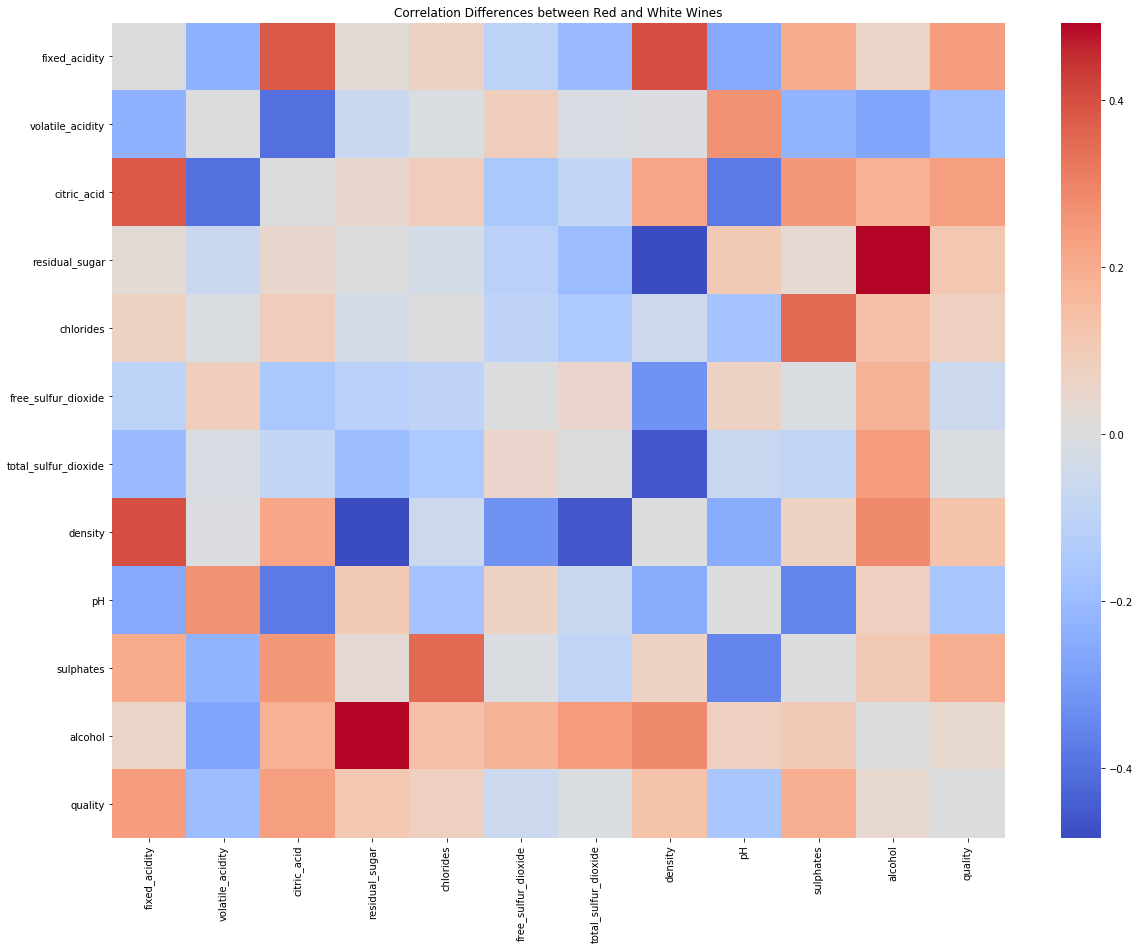

In [238]:
# Plotting difference between red and white wines
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Differences between Red and White Wines")
corr = df_r_corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="coolwarm")

#  Machine Learing 

### Applying Linear Regression 

In [239]:
# Seperating the target and input variables
df_x = df_final.drop(columns=['quality'])
y = df_final[['quality']]

In [240]:
# Scaling the imput variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [241]:
df_final.skew()

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [242]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 55,test_size = 0.20)

In [243]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score = 0
for r_state in range(42,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = r_state,test_size = 0.30)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state 
print("max r2 score coressponding to",final_r_state,"is",max_r_score)

max r2 score coressponding to 67 is 0.321027262677798


In [244]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring = "r2").mean()

0.25499437132559216

In [245]:
#max r2 score is 67
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 67,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred = lreg.predict(x_test)

In [246]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is : ",r2_score(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is :  0.32994674962821147
RMSE is : 0.7204937658073983


In [256]:
# coefficent of determination 
from sklearn.metrics import r2_score 
print(r2_score(y_test,pred))

0.5354946952408013


In [247]:
# Let's save the model
import joblib
joblib.dump(lreg,'winequlaity.pkl')

['winequlaity.pkl']